# NIFTY 50 Exploratory Data Analysis (EDA) Project

## 📦 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style

In [2]:
sns.set(style="whitegrid")



## 📥 2. Load the Dataset

In [3]:
df = pd.read_csv("NIFTY_50.csv")
df.head()

,Date,Open,High,Low,Close,Shares_Traded,Turnover_Rs_Cr
0,01-01-2018,10531.70,10537.85,10423.10,10435.55,134532090.0,7546.56
1,01-02-2018,10477.55,10495.20,10404.65,10442.20,158092430.0,8665.47
2,01-03-2018,10482.65,10503.60,10429.55,10443.20,172516859.0,9541.60
3,01-04-2018,10469.40,10513.00,10441.45,10504.80,180257392.0,9561.95
4,01-05-2018,10534.25,10566.10,10520.10,10558.85,186469717.0,10306.22



## 🧹 3. Data Cleaning

# Check basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1090 non-null   object 
 1   Open            1088 non-null   float64
 2   High            1086 non-null   float64
 3   Low             1087 non-null   float64
 4   Close           1089 non-null   float64
 5   Shares_Traded   1086 non-null   float64
 6   Turnover_Rs_Cr  1087 non-null   float64
dtypes: float64(6), object(1)
memory usage: 59.7+ KB


# Convert Date to datetime

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Impute missing numeric values with mean

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing Date with forward fill

In [7]:
df['Date'] = df['Date'].fillna(method='ffill')

C:\Users\58in\AppData\Local\Temp\ipykernel_19684\1291857192.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


# Fill any remaining non-numeric columns with forward fill

In [8]:
df.fillna(method='ffill', inplace=True)

C:\Users\58in\AppData\Local\Temp\ipykernel_19684\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Drop duplicates

In [9]:
df.drop_duplicates(inplace=True)

## 🧮 4. Descriptive Statistics
### Numerical summary


In [10]:
df.describe()

,Date,Open,High,Low,Close,Shares_Traded,Turnover_Rs_Cr
count,1089,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03,1089.000000
mean,2020-03-09 18:10:54.545454592,12786.537701,12857.851935,12693.918545,12772.650365,4.489654e+08,23613.289754
min,2018-01-01 00:00:00,7735.150000,8036.950000,7511.100000,7610.250000,3.219418e+07,1534.080000
25%,2019-02-06 00:00:00,10812.600000,10856.550000,10749.500000,10805.550000,2.780127e+08,16408.830000
50%,2020-03-12 00:00:00,11657.150000,11714.350000,11578.850000,11643.950000,4.000212e+08,22130.940000
75%,2021-04-12 00:00:00,15026.750000,15111.150000,14898.200000,14981.750000,5.854037e+08,29700.200000
max,2022-05-12 00:00:00,18602.350000,18604.450000,18445.300000,18477.050000,1.811564e+09,78522.930000
std,NaN,2650.242254,2654.181177,2636.448798,2649.467058,2.164023e+08,9375.874502


In [11]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares_Traded',
       'Turnover_Rs_Cr'],
      dtype='object')


### Daily movement value counts

In [12]:
print("Daily Movement Value Counts:", df['Close'].gt(df['Open']).value_counts())

Daily Movement Value Counts: False    567
True     522
Name: count, dtype: int64


## 🛠️ 5. Feature Engineering
### Daily movement direction

In [13]:
df['Daily_Movement'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')


### Pivot table: Average closing price by Weekday

In [29]:
# Print the column names to verify structure
print(df.columns)

# Create a new 'Weekday' column from the 'Date'
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

# Create the pivot table for average Turnover by weekday
pivot_table = df.pivot_table(values="Turnover_Rs_Cr", index="Weekday", aggfunc="mean")

# Reorder the index to reflect the weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
pivot_table = pivot_table.reindex(weekday_order)

# Display the sorted pivot table
print(pivot_table)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares_Traded',
       'Turnover_Rs_Cr', 'Daily_Movement', 'Price_Range', 'Volatility_Level',
       'Weekday'],
      dtype='object')
           Turnover_Rs_Cr
Weekday                  
Monday       22585.071605
Tuesday      24953.419946
Wednesday    23627.117412
Thursday     24017.566619
Friday       23258.666824


### Price range

In [14]:
df['Price_Range'] = df['High'] - df['Low']

In [15]:
# Volatility Level using qcut
df['Volatility_Level'] = pd.qcut(df['Price_Range'], q=3, labels=['Low', 'Medium', 'High'])


## 🔍 6. Visualizations
### Line plot of closing prices

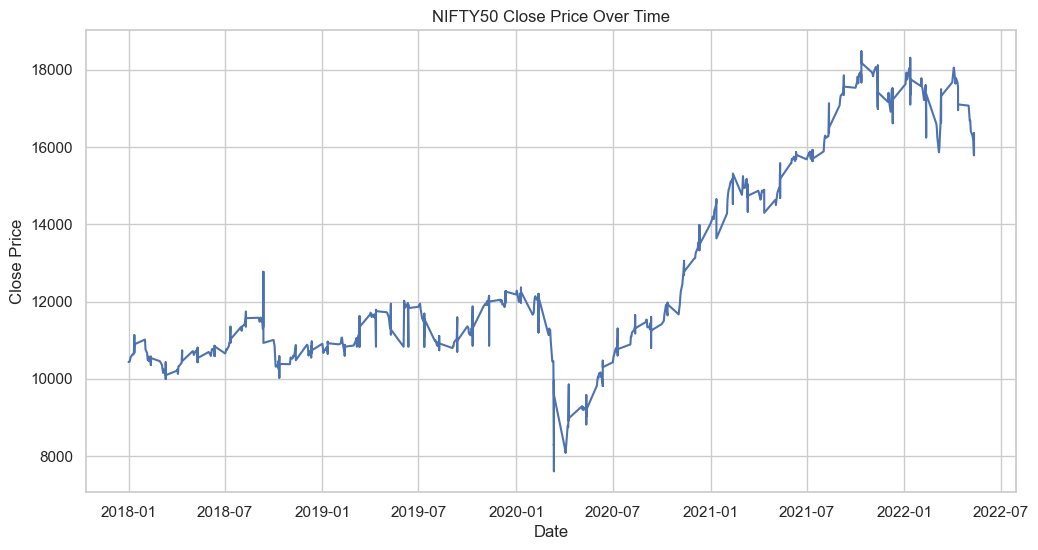

In [16]:

df.sort_values('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('NIFTY50 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Scatter plot

In [ ]:

## Histogram of Closing Prices

### Helps understand how the number of shares traded affects total turnover.



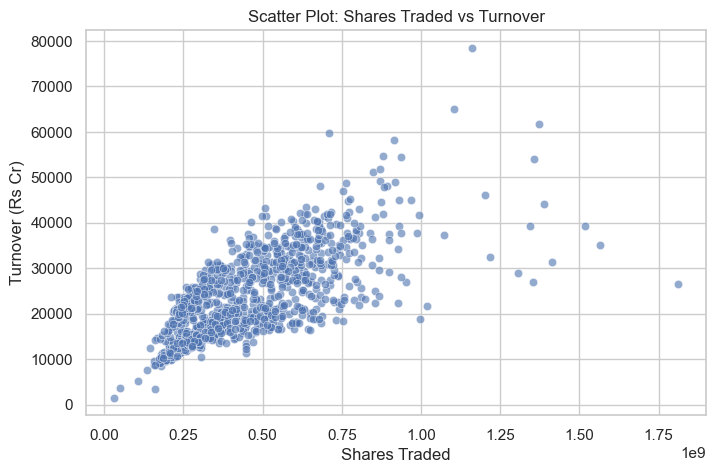

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Shares_Traded", y="Turnover_Rs_Cr", alpha=0.6)

plt.title("Scatter Plot: Shares Traded vs Turnover")
plt.xlabel("Shares Traded")
plt.ylabel("Turnover (Rs Cr)")
plt.show()

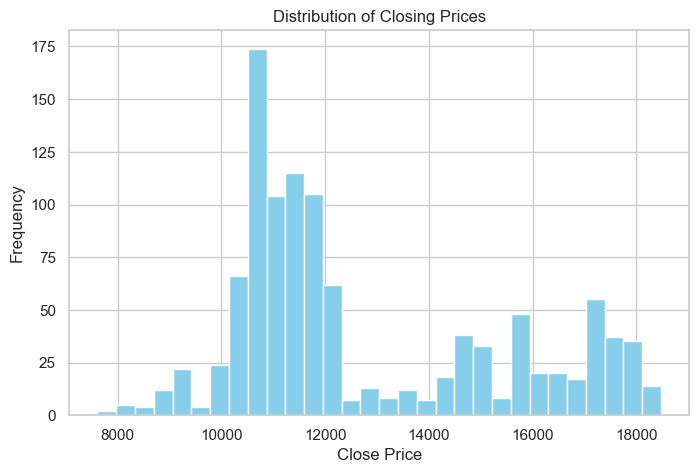

In [17]:

plt.figure(figsize=(8, 5))
df['Close'].hist(bins=30, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


### Boxplot for Outlier Detection

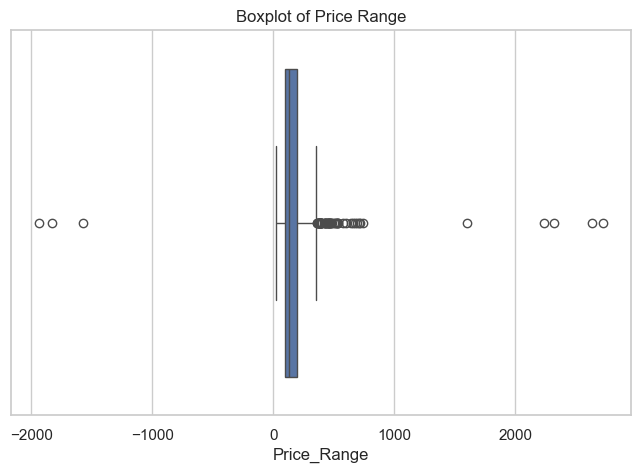

In [18]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price_Range'])
plt.title('Boxplot of Price Range')
plt.show()


### Countplot for Daily Movement

C:\Users\58in\AppData\Local\Temp\ipykernel_11576\3365340079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Daily_Movement', data=df, palette='Set2')


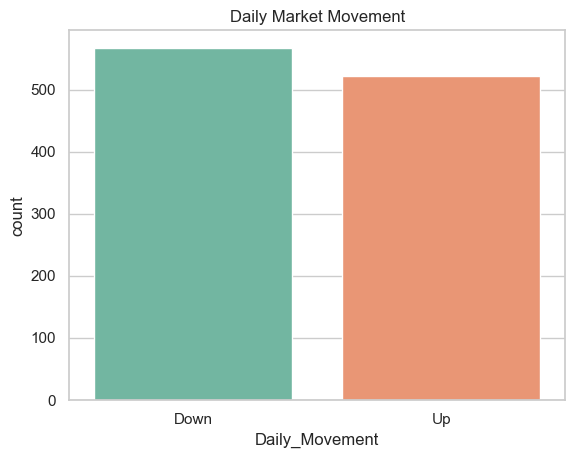

In [19]:
sns.countplot(x='Daily_Movement', data=df, palette='Set2')
plt.title('Daily Market Movement')
plt.show()

### Heatmap of correlations

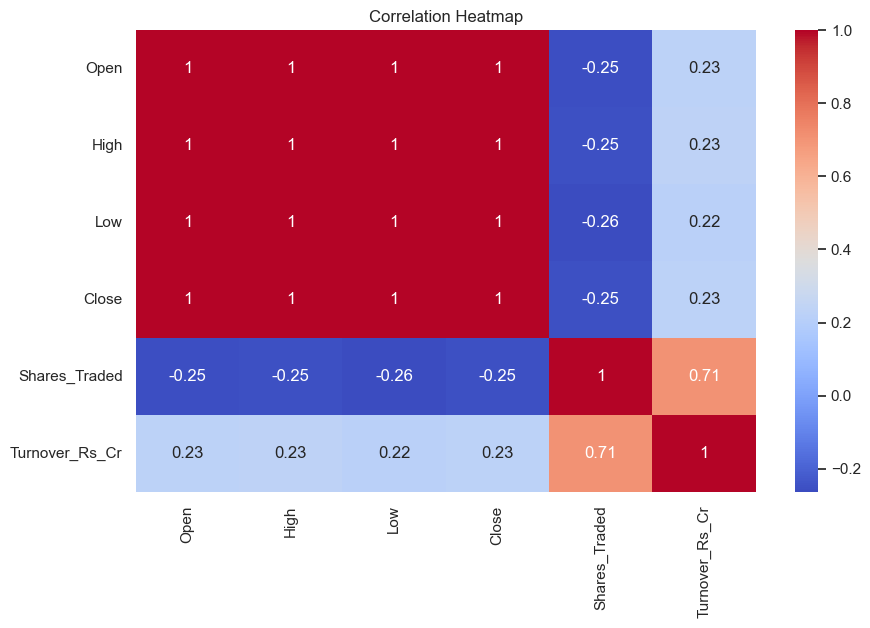

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Shares_Traded', 'Turnover_Rs_Cr']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🧾 7. Group Analysis

In [21]:
volatility_group = df.groupby('Volatility_Level')['Close'].mean()
print("\nAverage Close Price by Volatility Level:")
print(volatility_group)



Average Close Price by Volatility Level:
Volatility_Level
Low       11821.218182
Medium    12823.552335
High      13675.527619
Name: Close, dtype: float64


C:\Users\58in\AppData\Local\Temp\ipykernel_11576\1832374988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volatility_group = df.groupby('Volatility_Level')['Close'].mean()


In [22]:
movement_group = df.groupby('Daily_Movement')['Turnover_Rs_Cr'].mean()
print("\nAverage Turnover by Market Movement:")
print(movement_group)


Average Turnover by Market Movement:
Daily_Movement
Down    23291.106865
Up      23963.247031
Name: Turnover_Rs_Cr, dtype: float64


## 🧠 8. Advanced Python Techniques
### Lambda function: categorize based on closing price threshold

In [23]:
df['Price_Level'] = df['Close'].apply(lambda x: 'High' if x > 18000 else 'Low')

In [24]:
# User-defined function: calculate daily return range
def calc_range(row):
    return row['High'] - row['Low']
df['Range_Using_Function'] = df.apply(calc_range, axis=1)

In [25]:
# List comprehension: get columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Columns with missing values:", missing_cols)

Columns with missing values: []


## 📌 9. Insights & Conclusion

### Key Insights:
- The majority of days see the market go Up compared to Down.
- Higher volatility days tend to have larger price ranges.
- Volume and turnover vary significantly based on market direction.
- Distribution of prices is slightly right-skewed, suggesting some outliers.

### Next Steps:
- Time series forecasting of closing price.
- Incorporating technical indicators (like RSI, MACD).
- Exploring different classification models.